In [1]:
import pandas as pd 
import numpy as np  #for numerical calculation
from sklearn.model_selection import train_test_split #for training and testing data
import matplotlib.pyplot as plt #for ploting image like graph ...

from sklearn.tree import DecisionTreeClassifier #ML aglo decision_tree
# for finding 4 parameter 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
df=pd.read_csv('Admission_Predict.csv')

In [5]:
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [7]:
print(df.shape)
print(df.size)
print(df.columns)

(400, 9)
3600
Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [11]:
print(df.head(10))

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   
5           6        330          115                  5  4.5   3.0  9.34   
6           7        321          109                  3  3.0   4.0  8.20   
7           8        308          101                  2  3.0   4.0  7.90   
8           9        302          102                  1  2.0   1.5  8.00   
9          10        323          108                  3  3.5   3.0  8.60   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1             

In [13]:
print(df.describe())

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  400.000000  400.000000   400.000000         400.000000  400.000000   
mean   200.500000  316.807500   107.410000           3.087500    3.400000   
std    115.614301   11.473646     6.069514           1.143728    1.006869   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    100.750000  308.000000   103.000000           2.000000    2.500000   
50%    200.500000  317.000000   107.000000           3.000000    3.500000   
75%    300.250000  325.000000   112.000000           4.000000    4.000000   
max    400.000000  340.000000   120.000000           5.000000    5.000000   

             LOR         CGPA    Research  Chance of Admit   
count  400.000000  400.000000  400.000000        400.000000  
mean     3.452500    8.598925    0.547500          0.724350  
std      0.898478    0.596317    0.498362          0.142609  
min      1.000000    6.800000    0.000000          0.34000

In [15]:
x=df[['GRE Score','TOEFL Score','CGPA']] #input parameters
y=df['Chance of Admit '] #output

In [17]:
x.shape

(400, 3)

In [19]:
y.shape

(400,)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size= 0.2 , random_state=1) #test_size for choosing 20% data from dataset

In [23]:
y_train.shape

(320,)

In [25]:
print(x_train.head())

     GRE Score  TOEFL Score  CGPA
93         301           97  7.88
23         334          119  9.70
299        305          112  8.65
13         307          109  8.00
90         318          106  7.92


In [27]:
ty_train=[1 if y>0.80 else 0 for y in y_train]
ty_train=np.array(ty_train)

In [29]:
ty_train

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [31]:
ty_train.shape

(320,)

In [33]:
y_test.shape

(80,)

In [35]:
tree_model= DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)

In [37]:
tree_model.fit(x_train,ty_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [39]:
dt_pred= tree_model.predict(x_test)

In [41]:
ty_test=[1 if y>0.80 else 0 for y in y_test]
ty_test=np.array(ty_test)

In [43]:
ty_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [45]:
ty_test.shape

(80,)

In [47]:
print("ACTUAL  -  PREDICTED \n")
for x in ty_test:
    for y in dt_pred:
        print(x,"            ",y)

ACTUAL  -  PREDICTED 

0              0
0              0
0              0
0              0
0              1
0              0
0              0
0              0
0              0
0              1
0              1
0              1
0              1
0              0
0              0
0              0
0              1
0              1
0              0
0              0
0              0
0              0
0              1
0              1
0              0
0              0
0              0
0              0
0              1
0              0
0              1
0              0
0              1
0              1
0              0
0              0
0              0
0              0
0              1
0              0
0              1
0              0
0              1
0              0
0              1
0              0
0              0
0              1
0              0
0              0
0              1
0              0
0              1
0              0
0              0
0              1
0              0
0       

In [49]:
from sklearn import metrics

In [51]:
print(metrics.confusion_matrix(ty_test,dt_pred))

[[52  4]
 [ 2 22]]


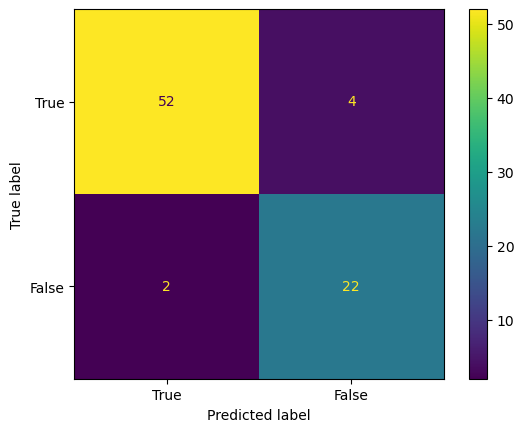

In [55]:
confusion_matrix =metrics.confusion_matrix(ty_test,dt_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True,False])
cm_display.plot()
plt.show()

In [57]:
print("Accuracy:    %.3f" % accuracy_score(ty_test, dt_pred))  #.3f = f for floating value and 3 for upto 3 decimal points.
print("Precision:   %.3f" % precision_score(ty_test, dt_pred))
print("f1 score:    %.3f" % f1_score(ty_test, dt_pred))
print("recall:      %.3f" % recall_score(ty_test,dt_pred))

Accuracy:    0.925
Precision:   0.846
f1 score:    0.880
recall:      0.917


In [59]:
from sklearn import tree

[Text(0.5, 0.875, 'x[2] <= 8.92\ngini = 0.412\nsamples = 320\nvalue = [227, 93]'),
 Text(0.25, 0.625, 'x[2] <= 8.63\ngini = 0.07\nsamples = 221\nvalue = [213, 8]'),
 Text(0.125, 0.375, 'x[0] <= 320.5\ngini = 0.012\nsamples = 164\nvalue = [163, 1]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 150\nvalue = [150, 0]'),
 Text(0.1875, 0.125, 'gini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.375, 0.375, 'x[0] <= 323.5\ngini = 0.215\nsamples = 57\nvalue = [50, 7]'),
 Text(0.3125, 0.125, 'gini = 0.283\nsamples = 41\nvalue = [34.0, 7.0]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(0.75, 0.625, 'x[2] <= 9.105\ngini = 0.243\nsamples = 99\nvalue = [14, 85]'),
 Text(0.625, 0.375, 'x[0] <= 313.5\ngini = 0.488\nsamples = 26\nvalue = [11.0, 15.0]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6875, 0.125, 'gini = 0.469\nsamples = 24\nvalue = [9, 15]'),
 Text(0.875, 0.375, 'x[0] <= 319.0\ngini = 0.079\nsamples = 73\nvalue = [3, 70]'),
 

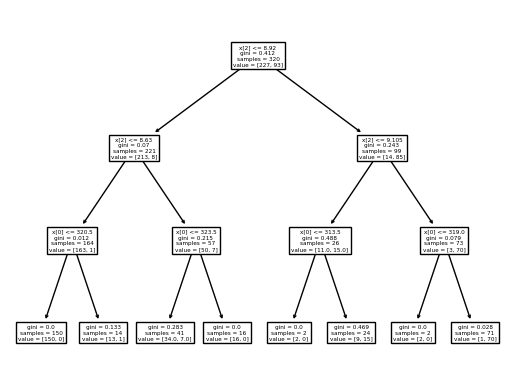

In [61]:
tree.plot_tree(tree_model)

In [63]:
new_data=[[337,118,9.80]] #you can take any value by using dataset 

In [65]:
prediction = tree_model.predict(new_data)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [67]:
if prediction==1:
    print("get admission")
else:
    print("not get admission")

get admission
